In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import base64
from IPython.display import HTML

df = pd.read_csv('churn_data.csv')

### Display Variance and Covariance Matrixes

In [10]:
ddff = df.copy()
ddff = ddff[['Age','Income','Outage_sec_perweek','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']]
scale = StandardScaler().fit_transform(ddff)
display(scale[:8])
variables = scale.T
covariance_matrix = np.cov(variables)
display(covariance_matrix[:8])

array([[ 0.72092524, -0.39877774, -0.6799776 ,  0.9466579 , -1.04874621,
        -0.00394256, -1.13848703],
       [-1.25995716, -0.64195445,  0.57033109,  0.9466579 , -1.26200116,
         1.6303259 , -1.18587584],
       [-0.14873045, -1.07088496,  0.25234705,  0.9466579 , -0.7099398 ,
        -0.29522482, -0.61213775],
       [-0.24535886, -0.74052492,  1.65050585, -0.62586353, -0.65952396,
        -1.22652107, -0.56185715],
       [ 1.44563831,  0.00947792, -0.62315605,  0.9466579 , -1.2425512 ,
        -0.5280857 , -1.42818447],
       [ 1.44563831, -0.60807216, -0.5312245 ,  0.9466579 , -1.04097514,
         0.28836988, -1.07678889],
       [ 1.25238149, -1.00499743,  0.39681714,  0.9466579 , -0.80514421,
         0.64026766, -0.67962126],
       [-1.11501455, -0.46269425, -0.74271242, -0.62586353, -1.14447583,
        -1.34309826, -1.10412995]])

array([[ 1.00010001, -0.00409101, -0.00804752,  0.00857821,  0.01698097,
         0.01072958, -0.01472512],
       [-0.00409101,  1.00010001, -0.01001155,  0.00542382,  0.00211458,
        -0.00301427,  0.00367392],
       [-0.00804752, -0.01001155,  1.00010001,  0.00290902,  0.00293225,
         0.02049812,  0.00417608],
       [ 0.00857821,  0.00542382,  0.00290902,  1.00010001,  0.01243615,
        -0.00717299,  0.0120349 ],
       [ 0.01698097,  0.00211458,  0.00293225,  0.01243615,  1.00010001,
        -0.00333714,  0.99159435],
       [ 0.01072958, -0.00301427,  0.02049812, -0.00717299, -0.00333714,
         1.00010001,  0.06041247],
       [-0.01472512,  0.00367392,  0.00417608,  0.0120349 ,  0.99159435,
         0.06041247,  1.00010001]])

### Display Eigenvalues and Vectors

In [11]:
values, vectors = np.linalg.eig(covariance_matrix)
display(values[:8])
display(vectors[:8])

array([0.00593082, 1.99368236, 0.96840728, 1.02531864, 1.00947943,
       1.00073459, 0.99714695])

array([[ 2.30113664e-02,  2.10617174e-03, -4.31683876e-01,
         4.00642825e-02, -8.21254727e-01, -3.60481009e-01,
        -8.42854774e-02],
       [-1.15122660e-03,  4.01885454e-03, -2.41881033e-01,
        -3.79763428e-01,  1.86269120e-02,  3.92438807e-01,
        -8.01810856e-01],
       [ 2.27034197e-04,  5.88540347e-03, -5.72183389e-01,
         6.33767905e-01,  1.01590029e-01,  4.96673430e-01,
         1.17918165e-01],
       [-2.52635010e-04,  1.71617727e-02,  3.48621578e-01,
        -1.95261286e-01, -5.24941801e-01,  6.84318367e-01,
         3.10138540e-01],
       [-7.05538924e-01,  7.05761719e-01, -4.12202155e-02,
        -3.74010956e-02,  5.87920876e-03, -1.54774655e-02,
         2.72609166e-02],
       [-4.55783371e-02,  4.06273259e-02,  5.51762680e-01,
         6.42637826e-01, -1.97196994e-01, -2.83956862e-02,
        -4.89033369e-01],
       [ 7.06828464e-01,  7.07036113e-01,  8.40248290e-03,
         1.91006770e-03,  1.96993392e-02, -4.82028549e-03,
        -2.8120706

### Calculate Variance Per Variable in the Dataset

In [4]:
var = []
for i in range(len(values)):
    var.append(values[i] / np.sum(values))
display(np.sum(var), var)

0.9999999999999998

[0.0008471757202331019,
 0.28478328397797903,
 0.13833006207956655,
 0.14645944426772736,
 0.14419692588321326,
 0.14294778876038153,
 0.1424353193108991]

In [17]:
# Calculate Total Variance Captured by Principal Components
var = []
for i in range(len(values)):
    if values[i] >= 1:
        var.append(values[i] / np.sum(values))
display(np.sum(var), var)

0.7183874428893012

[0.28478328397797903,
 0.14645944426772736,
 0.14419692588321326,
 0.14294778876038153]

### Visualize Scree Plot

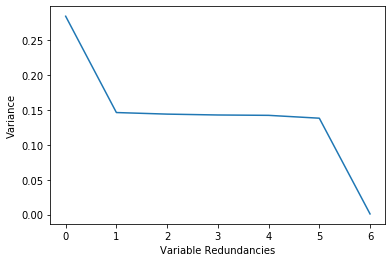

In [5]:
pa = PCA(n_components=ddff.shape[1])
pa.fit(scale)
df_pc = pd.DataFrame(pa.transform(ddff),columns=['P1','P2','P3','P4','P5','P6','P7'])
plt.plot(pa.explained_variance_ratio_)
plt.xlabel('Variable Redundancies')
plt.ylabel('Variance')
plt.show();

In [6]:
ddff = ddff[['Income', 'Yearly_equip_failure','Tenure','MonthlyCharge']]
scale = StandardScaler().fit_transform(ddff)
variables = scale.T
covariance_matrix = np.cov(variables)
values, vectors = np.linalg.eig(covariance_matrix)
var = []
for i in range(len(values)):
    var.append(values[i] / np.sum(values))
display(np.sum(var), var)

0.9999999999999998

[0.2545237466481783,
 0.2466470316907936,
 0.24966870199395155,
 0.24916051966707642]

In [7]:
df_pc.to_csv('clean_churn_data.csv', sep=',')
def create_download_link(df_pc, title = "Download CSV file", filename = "data.csv"):
    csv = df_pc.to_csv(index = False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df_pc)